## Entrega 6
### Ignacio Ziccardi
### Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere (considero Hamming). 

$x(k)=a_0⋅sen(Ω_1⋅k)+n_a(n)$<br>
siendo<br>
$Ω_1=Ω_0+f_r⋅2πN$<br>
$Ω_0=\frac{π}{2}$<br>
siendo la variable aleatoria definida por la siguiente distribución de probabilidad<br>
$f_r∼U(−2,2)$<br>
$na∼N(0,σ^2)$<br>
Diseñe los siguientes estimadores,  de amplitud $a_1$<br>
$a^i_1=|X^i_w(Ω_0)|=|F{x(n)⋅w_i(n)}|$<br>
para la  $i$-ésima realización y la  $w$-ésima ventana (ver detalles debajo). y de frecuencia $Ω_1$<br>
$Ω^i_1=arg max{|X^i_w(Ω)|}$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig
import random as random
#%%
Fo = 1.0
Fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
ts = 1/Fs # tiempo de muestreo
df = Fs/N # resolución espectral
Ac =2**0.5 #Amplitud 
DC = 0 #Valor Contínua
tita = 0 #Defasaje
#----------------------------------------Estos 3 se repetirán cuando se cambie la SNR
SNR = 3 # SNR en dB
sigma = (10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar
#----------------------------------------
Omega_0 = Fs/4
R = 200

In [2]:
#%% Funciones
def my_sin_gen( vmax, dc, fo, ph, nn, fs): 
    tt = np.arange(0,nn*1/fs,1/fs) # grilla de sampleo temporal
    xx = vmax*np.sin(2*np.pi*fo*tt + ph) + dc #Senoidal
    return [tt, xx]

### Genero las señales requeridas con sus funciones de probabilidad correspondientes

In [3]:
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, (R,N))
#Genero la variable Omega según la distribución de fr
fr=np.random.uniform(-2,2,R).reshape((R,1))
Omega_1 = Omega_0 + fr*df

tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo*Omega_1, ph=tita, nn = N, fs =Fs )

ss= s + na

### Aplico la Ventana Requerida y Obtengo las transformadas para obtener los estimadores de cada ventana
Nota: No se plotea el gráfico con las 200 trasnformadas porque se corroboró con antelación para que no queden muchos gráficos en la entrega

**Ventana Recctangular**

In [4]:
#%%Ventana Rectangular

wi_1 = sig.windows.get_window('boxcar', len(tt))

X_1 = ss * wi_1

TFF_X_1=np.fft.fft(X_1, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_1=np.abs(TFF_X_1)
#mod_X_LOG_=10*np.log10(2*np.abs(TFF_X_1)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_1 = mod_X_1[:,lim] # Estimador para ventana rectangular

Omega_estimador_1 = np.argmax(mod_X_1[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_1 = sum(a_estimador_1/200)
Esperanza_Omega_1 = sum(Omega_estimador_1/200)
S_a_3dB = Esperanza_a_1 - Ac
V_a_3dB = sum((a_estimador_1-Esperanza_a_1)**2)/200
S_Omega_3db = sum(Omega_1.flatten() - Omega_estimador_1.flatten())/200
V_Omega_3db = sum((Omega_estimador_1-Esperanza_Omega_1)**2)/200


**Ventana Flattop**

In [5]:
wi_2 = sig.windows.get_window('flattop', len(tt))

X_2 = ss * wi_2

TFF_X_2=np.fft.fft(X_2, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_2=np.abs(TFF_X_2)
mod_X_LOG_2=10*np.log10(2*np.abs(TFF_X_2)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

#lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_2 = mod_X_2[:,lim] # Estimador para ventana rectangular

Omega_estimador_2 = np.argmax(mod_X_2[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_2 = sum(a_estimador_2/200)
Esperanza_Omega_2 = sum(Omega_estimador_2/200)
S_a_FL_3dB = Esperanza_a_2 - Ac
V_a_FL_3dB = sum((a_estimador_2-Esperanza_a_2)**2)/200
S_Omega_FL_3db = sum(Omega_1.flatten() - Omega_estimador_2.flatten())/200
V_Omega_FL_3db = sum((Omega_estimador_2-Esperanza_Omega_2)**2)/200

**Ventana Blackmanharris**

In [6]:
wi_3 = sig.windows.get_window('blackmanharris', len(tt))

X_3 = ss * wi_3

TFF_X_3=np.fft.fft(X_3, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_3=np.abs(TFF_X_3)
mod_X_LOG_3=10*np.log10(2*np.abs(TFF_X_3)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

# lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_3 = mod_X_3[:,lim] # Estimador para ventana rectangular

Omega_estimador_3 = np.argmax(mod_X_3[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_3 = sum(a_estimador_3/200)
Esperanza_Omega_3 = sum(Omega_estimador_3/200)
S_a_BL_3dB = Esperanza_a_3 - Ac
V_a_BL_3dB = sum((a_estimador_3-Esperanza_a_3)**2)/200
S_Omega_BL_3db = sum(Omega_1.flatten() - Omega_estimador_3.flatten())/200
V_Omega_BL_3db = sum((Omega_estimador_3-Esperanza_Omega_3)**2)/200

**Ventana Hamming**

In [7]:
wi_4 = sig.windows.get_window('hamming', len(tt))

X_4 = ss * wi_4

TFF_X_4=np.fft.fft(X_4, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_4=np.abs(TFF_X_4)
mod_X_LOG_4=10*np.log10(2*np.abs(TFF_X_4)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

# lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_4 = mod_X_4[:,lim] # Estimador para ventana rectangular

Omega_estimador_4 = np.argmax(mod_X_4[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_4 = sum(a_estimador_4/200)
Esperanza_Omega_4 = sum(Omega_estimador_4/200)
S_a_HG_3dB = Esperanza_a_4 - Ac
V_a_HG_3dB = sum((a_estimador_4-Esperanza_a_4)**2)/200
S_Omega_HG_3db = sum(Omega_1.flatten() - Omega_estimador_4.flatten())/200
V_Omega_HG_3db = sum((Omega_estimador_4-Esperanza_Omega_4)**2)/200

### Ahora se repetirá el proceso anterior pero cambiando la SNR a 10dB

In [8]:
SNR = 10 # SNR en dB
sigma = (10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar

In [9]:
#Genero señal aleatoria para el ruido
na=np.random.normal(0, desvio, (R,N))
#Genero la variable Omega según la distribución de fr
fr=np.random.uniform(-2,2,R).reshape((R,1))
Omega_1 = Omega_0 + fr*df

tt, s = my_sin_gen(vmax = Ac, dc = DC, fo = Fo*Omega_1, ph=tita, nn = N, fs =Fs )

ss= s + na

**Ventana Rectangular**

In [10]:
X_5 = ss * wi_1

TFF_X_5=np.fft.fft(X_5, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_5=np.abs(TFF_X_5)
mod_X_LOG_5=10*np.log10(2*np.abs(TFF_X_5)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

# lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_5 = mod_X_5[:,lim] # Estimador para ventana rectangular

Omega_estimador_5 = np.argmax(mod_X_5[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_5 = sum(a_estimador_5/200)
Esperanza_Omega_5 = sum(Omega_estimador_5/200)

S_a_10dB = Esperanza_a_5 - Ac
V_a_10dB = sum((a_estimador_5-Esperanza_a_5)**2)/200
S_Omega_10db = sum(Omega_1.flatten() - Omega_estimador_5.flatten())/200
V_Omega_10db = sum((Omega_estimador_5-Esperanza_Omega_5)**2)/200

**Ventana Flattop**

In [11]:
X_6 = ss * wi_2

TFF_X_6=np.fft.fft(X_6, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_6=np.abs(TFF_X_6)
mod_X_LOG_6=10*np.log10(2*np.abs(TFF_X_6)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

# lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_6 = mod_X_6[:,lim] # Estimador para ventana rectangular

Omega_estimador_6 = np.argmax(mod_X_6[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_6 = sum(a_estimador_6/200)
Esperanza_Omega_6 = sum(Omega_estimador_6/200)

S_a_FL_10dB = Esperanza_a_6 - Ac
V_a_FL_10dB = sum((a_estimador_6-Esperanza_a_6)**2)/200
S_Omega_FL_10db = sum(Omega_1.flatten() - Omega_estimador_6.flatten())/200
V_Omega_FL_10db = sum((Omega_estimador_6-Esperanza_Omega_6)**2)/200

**Ventana Blackmanharris**

In [12]:
X_7 = ss * wi_3

TFF_X_7=np.fft.fft(X_7, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_7=np.abs(TFF_X_7)
mod_X_LOG_7=10*np.log10(2*np.abs(TFF_X_7)**2)
# #ff = np.arange(0,Fs,df) # grilla de frecuencia
# #bfrec = ff <= Fs/2

# st = int (N/4) - 10
# fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

# lim = int (N/4)-1

# #Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_7 = mod_X_7[:,lim] # Estimador para ventana rectangular

Omega_estimador_7 = np.argmax(mod_X_7[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_7 = sum(a_estimador_7/200)
Esperanza_Omega_7 = sum(Omega_estimador_7/200)

S_a_BL_10dB = Esperanza_a_7 - Ac
V_a_BL_10dB = sum((a_estimador_7-Esperanza_a_7)**2)/200
S_Omega_BL_10db = sum(Omega_1.flatten() - Omega_estimador_7.flatten())/200
V_Omega_BL_10db = sum((Omega_estimador_7-Esperanza_Omega_7)**2)/200

**Ventana Hamming**

In [13]:
X_8 = ss * wi_4

TFF_X_8=np.fft.fft(X_8, axis = -1)/len(tt)#Espectro de la señal cuantizada
mod_X_8=np.abs(TFF_X_8)
mod_X_LOG_8=10*np.log10(2*np.abs(TFF_X_8)**2)
#ff = np.arange(0,Fs,df) # grilla de frecuencia
#bfrec = ff <= Fs/2

#st = int (N/4) - 10
#fin = int (N/4) + 10


# plt.figure("DFT Senoidales",figsize=(15, 7))
# plt.title('DFT Senoidales')
# #plt.plot(mod_X[0,:])
# plt.plot(mod_X_LOG[:,st:fin].transpose())
# plt.ylabel("DFT Amplitude |X(freq)|")
# plt.legend()
# plt.show()

#lim = int (N/4)-1

#Me quedo con la columna correspondiente a pi/2 que sería el equivalente de fs/4 = 1000/4 = 250
a_estimador_8 = mod_X_8[:,lim] # Estimador para ventana rectangular

Omega_estimador_8 = np.argmax(mod_X_8[:,0:N//2],axis=1)#Recordar recortar a Nyquist

Esperanza_a_8 = sum(a_estimador_8/200)
Esperanza_Omega_8 = sum(Omega_estimador_8/200)

S_a_HG_10dB = Esperanza_a_8 - Ac
V_a_HG_10dB = sum((a_estimador_8-Esperanza_a_8)**2)/200

S_Omega_HG_10db = sum(Omega_1.flatten() - Omega_estimador_8.flatten())/200
V_Omega_HG_10db = sum((Omega_estimador_8-Esperanza_Omega_8)**2)/200

In [14]:
lista_A = ['Rectangular', 'Flat-top','Blackman', 'Hamming']
A = np.array([[S_a_3dB], [S_a_FL_3dB], [S_a_BL_3dB], [S_a_HG_3dB]])
B = np.array([[V_a_3dB], [V_a_FL_3dB], [V_a_BL_3dB], [V_a_HG_3dB]])
C = np.array([[S_Omega_3db], [S_Omega_FL_3db], [S_Omega_BL_3db], [S_Omega_HG_3db]])
D = np.array([[V_Omega_3db], [V_Omega_FL_3db], [V_Omega_BL_3db],[V_Omega_HG_3db]])

In [15]:
from IPython.display import Markdown, display
from IPython.display import display, HTML

display(HTML("<h2 style='font-weight: bold; font-style: italic; text-decoration: underline; color: darkblue;'>Tablas con valores para 3 dB</h2>"))
# Cabecera
header = f"| Ventana | $s_a$       | $v_a$       |\n"
separator = "| ---- | ------- | ------- |\n"

# Cuerpo
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{A[i, 0]:.4f}"
    b_val = f"{B[i, 0]:.4f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} |\n"

# Combinar y mostrar
markdown_table = header + separator + body
display(Markdown(markdown_table))

# Cabecera
header = f"| Ventana | $s_Ω$       | $v_Ω$       |\n"
separator = "| ---- | ------- | ------- |\n"

# Cuerpo
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{C[i, 0]:.4f}"
    b_val = f"{D[i, 0]:.4f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} |\n"

# Combinar y mostrar
markdown_table = header + separator + body
display(Markdown(markdown_table))

| Ventana | $s_a$       | $v_a$       |
| ---- | ------- | ------- |
| Rectangular | -1.1630 | 0.0588 |
| Flat-top | -1.2931 | 0.0017 |
| Blackman | -1.2728 | 0.0086 |
| Hamming | -1.2496 | 0.0217 |


| Ventana | $s_Ω$       | $v_Ω$       |
| ---- | ------- | ------- |
| Rectangular | -0.0349 | 1.5536 |
| Flat-top | -0.0249 | 1.5651 |
| Blackman | -0.0299 | 1.5394 |
| Hamming | -0.0299 | 1.5594 |


In [16]:
A = np.array([[S_a_10dB], [S_a_FL_10dB], [S_a_BL_10dB], [S_a_HG_10dB]])
B = np.array([[V_a_10dB], [V_a_FL_10dB], [V_a_BL_10dB], [V_a_HG_10dB]])
C = np.array([[S_Omega_10db], [S_Omega_FL_10db], [S_Omega_BL_10db], [S_Omega_HG_10db]])
D = np.array([[V_Omega_10db], [V_Omega_FL_10db], [V_Omega_BL_10db],[V_Omega_HG_10db]])

In [17]:
display(HTML("<h2 style='font-weight: bold; font-style: italic; text-decoration: underline; color: darkblue;'>Tablas con valores para 10 dB</h2>"))
# Cabecera
header = f"| Ventana | $s_a$       | $v_a$       |\n"
separator = "| ---- | ------- | ------- |\n"

# Cuerpo
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{A[i, 0]:.4f}"
    b_val = f"{B[i, 0]:.4f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} |\n"

# Combinar y mostrar
markdown_table = header + separator + body
display(Markdown(markdown_table))

# Cabecera
header = f"| Ventana | $s_Ω$       | $v_Ω$       |\n"
separator = "| ---- | ------- | ------- |\n"

# Cuerpo
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{C[i, 0]:.4f}"
    b_val = f"{D[i, 0]:.4f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} |\n"

# Combinar y mostrar
markdown_table = header + separator + body
display(Markdown(markdown_table))

| Ventana | $s_a$       | $v_a$       |
| ---- | ------- | ------- |
| Rectangular | -1.1567 | 0.0557 |
| Flat-top | -1.2892 | 0.0014 |
| Blackman | -1.2654 | 0.0078 |
| Hamming | -1.2432 | 0.0210 |


| Ventana | $s_Ω$       | $v_Ω$       |
| ---- | ------- | ------- |
| Rectangular | -0.0217 | 1.4564 |
| Flat-top | 0.0183 | 1.5300 |
| Blackman | -0.0217 | 1.4564 |
| Hamming | -0.0217 | 1.4564 |


# Conclusiones

#### En esta tarea se observa feacientemente la influencia de la ventana utilizada para analizar la señal en cuestión. Con estos resultados se concluye que la mejor opción es la ventana que genera una menor varianza, ya que el sesgo se lo considera similar a un error sistemático, es constante y repetible en cada medición y se manifiesta de forma predecible. La Varianza al ser más pequeña indica una menor dispersión en los resultados, por lo que será la mejor opción para el análisis de datos. También se puede afirmar que a pesar del cambio de SNR no varían mucho los sesgos y varianzas. Para finalizar la entrega se adjuntan los histogramas para los estimadores donde se queda acentuada la diferencia de sesgos y varianzas para cada ventana de forma visual.



### Gráfico de los distintos histogramas para ambos estimadores en ambos casos

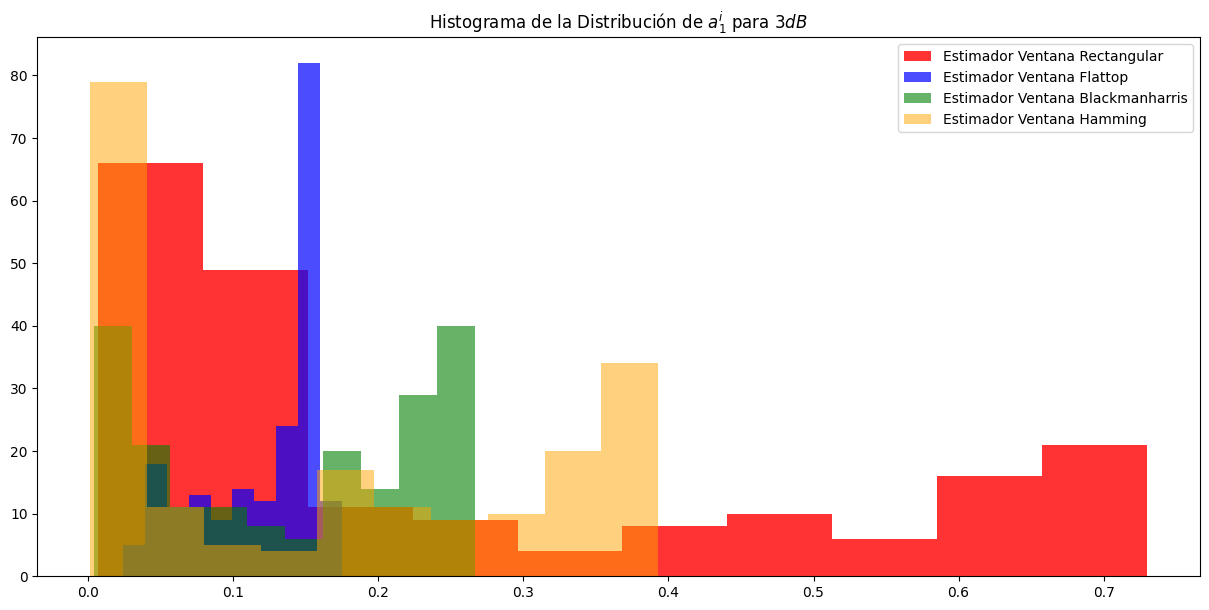

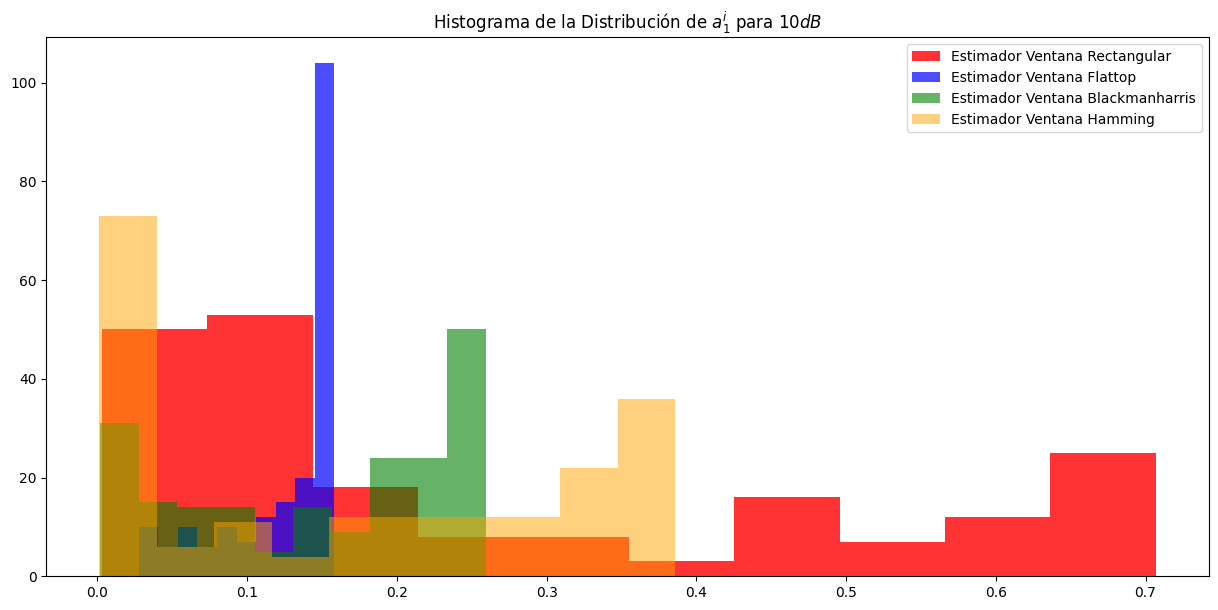

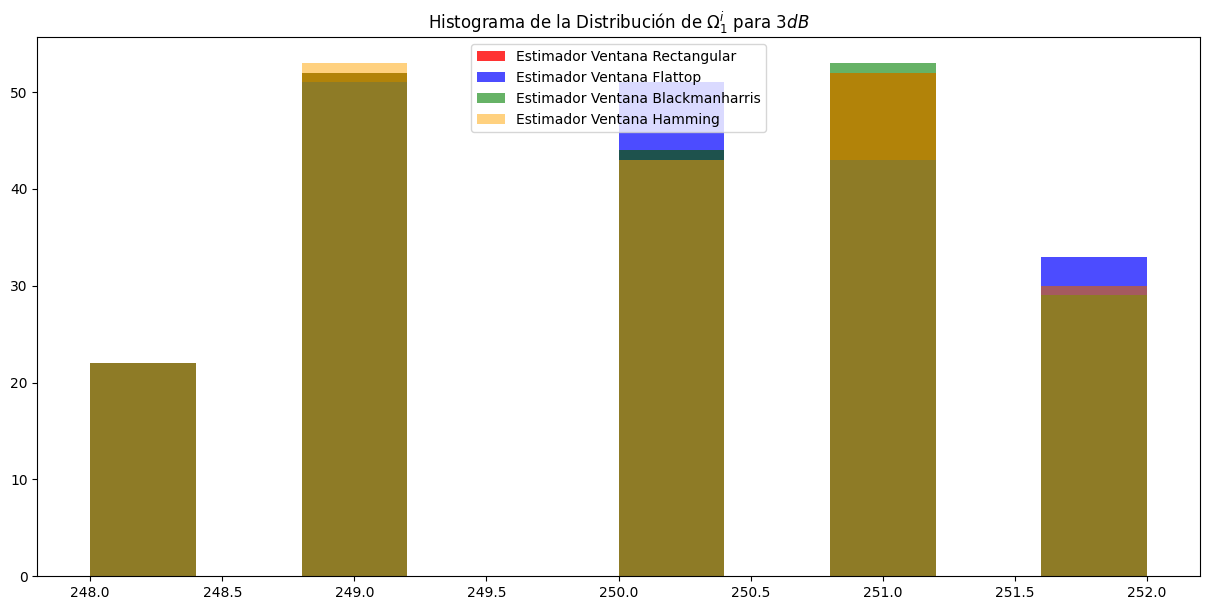

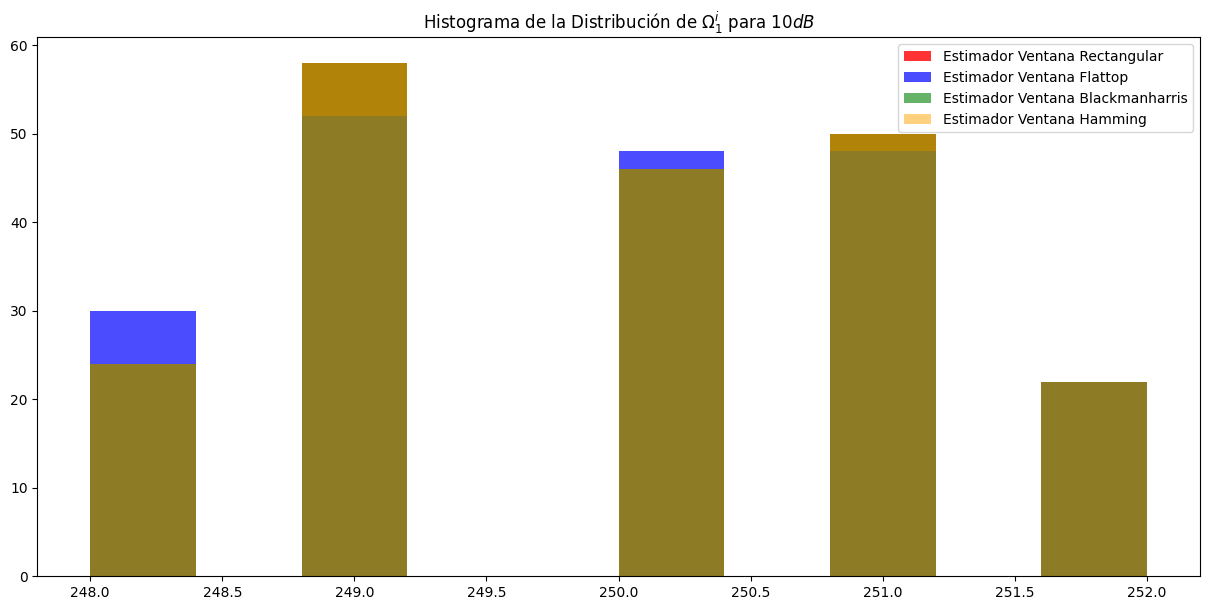

In [23]:
plt.close('all')
plt.figure("Histograma Amplitud 3dB",figsize=(15, 7))
plt.title(f"Histograma de la Distribución de $a_1^i$ para $3dB$")
plt.hist(a_estimador_1,color = 'red', label="Estimador Ventana Rectangular",alpha=0.8)
plt.hist(a_estimador_2,color = 'blue', label="Estimador Ventana Flattop",alpha=0.7)
plt.hist(a_estimador_3,color = 'green', label="Estimador Ventana Blackmanharris",alpha=0.6)
plt.hist(a_estimador_4,color = 'orange', label="Estimador Ventana Hamming",alpha=0.5)
plt.legend()
plt.show()

plt.figure("Histograma Amplitud 10dB",figsize=(15, 7))
plt.title(f"Histograma de la Distribución de $a_1^i$ para $10dB$")
plt.hist(a_estimador_5,color = 'red', label="Estimador Ventana Rectangular",alpha=0.8)
plt.hist(a_estimador_6,color = 'blue', label="Estimador Ventana Flattop",alpha=0.7)
plt.hist(a_estimador_7,color = 'green', label="Estimador Ventana Blackmanharris",alpha=0.6)
plt.hist(a_estimador_8,color = 'orange', label="Estimador Ventana Hamming",alpha=0.5)
plt.legend()
plt.show()

plt.figure("Histograma Frecuencia 3dB",figsize=(15, 7))
plt.title(f"Histograma de la Distribución de $Ω^i_1$ para $3dB$")
plt.hist(Omega_estimador_1,color = 'red', label="Estimador Ventana Rectangular",alpha=0.8)
plt.hist(Omega_estimador_2,color = 'blue', label="Estimador Ventana Flattop",alpha=0.7)
plt.hist(Omega_estimador_3,color = 'green', label="Estimador Ventana Blackmanharris",alpha=0.6)
plt.hist(Omega_estimador_4,color = 'orange', label="Estimador Ventana Hamming",alpha=0.5)
plt.legend()
plt.show()

plt.figure("Histograma Frecuencia 10dB",figsize=(15, 7))
plt.title(f"Histograma de la Distribución de $Ω^i_1$ para $10dB$")
plt.hist(Omega_estimador_5,color = 'red', label="Estimador Ventana Rectangular",alpha=0.8)
plt.hist(Omega_estimador_6,color = 'blue', label="Estimador Ventana Flattop",alpha=0.7)
plt.hist(Omega_estimador_7,color = 'green', label="Estimador Ventana Blackmanharris",alpha=0.6)
plt.hist(Omega_estimador_8,color = 'orange', label="Estimador Ventana Hamming",alpha=0.5)
plt.legend()
plt.show()

### El Histograma confirma de cierta forma los cálculos realizados anteriormente ya que para la ventana de flat-top se observa justamente la menor varianza para la amplitud.